# Deep Learning
# DL12 PM2.5 Serie Tiempo 1D Convolucion

## <font color='blue'>**1D-CNN aplicado a series de tiempo univariadas.**</font>
<p style='text-align: justify;'>

Una serie de tiempo es una serie de puntos de datos indexados (o listados o graficados) en orden de tiempo. M√°s com√∫nmente, una serie de tiempo es una secuencia tomada en sucesivos puntos equidistantes en el tiempo. Por lo tanto, es una secuencia de datos de tiempo discreto. Ejemplos de series temporales son las alturas de las mareas oce√°nicas, los recuentos de manchas solares y el valor de cierre diario del Promedio Industrial Dow Jones.

Las series temporales se trazan con mucha frecuencia a trav√©s de gr√°ficos de l√≠neas. Las series de tiempo se usan en estad√≠stica, procesamiento de se√±ales, reconocimiento de patrones, econometr√≠a, finanzas matem√°ticas, pron√≥stico del tiempo, predicci√≥n de terremotos, electroencefalograf√≠a, ingenier√≠a de control, astronom√≠a, ingenier√≠a de comunicaciones y en gran medida en cualquier dominio de la ciencia aplicada y la ingenier√≠a que involucra mediciones temporales.

El t√©rmino "serie temporal univariadas" se refiere a una serie temporal que consiste en observaciones individuales (escalares) registradas secuencialmente en incrementos de tiempo iguales
    
En este notebook, utilizaremos una red convolucional de una dimensi√≥n para desarrollar modelos de pron√≥stico de series temporales univariadas.
El conjunto de datos utilizado para los ejemplos de este notebook es sobre la contaminaci√≥n del aire medida por la concentraci√≥n de material particulado (PM) de di√°metro menor o igual a 2.5 micr√≥metros. Hay otras variables
tales como presi√≥n de aire, temperatura del aire, punto de roc√≠o, que tambien ser√°n utilizadas para realizar presiccones.
</p>

En este caso, se desarrollar√° un modelo de series temporales: para la predicci√≥n de pm2.5.
El notebook se divide en la siguiente etapas:
1. Visualizaci√≥n de la data
2. Procesamiento de la data
3. Construcci√≥n del modelo y su entrenamiento
4. Resultados y validaci√≥n del modelo.


Importancia de la predicci√≥n del material particulado:

<p style='text-align: justify;'>
El material particulado respirable presente en la atm√≥sfera de nuestras ciudades en forma s√≥lida o l√≠quida (polvo, cenizas, holl√≠n, part√≠culas met√°licas, cemento y polen, entre otras) se puede dividir, seg√∫n su tama√±o, en dos grupos principales. A las de di√°metro aerodin√°mico igual o inferior a los 10 ¬µm o 10 micr√≥metros (1 ¬µm corresponde a la mil√©sima parte de un mil√≠metro) se las denomina PM10 y a la fracci√≥n respirable m√°s peque√±a, PM2,5. Estas √∫ltimas est√°n constituidas por aquellas part√≠culas de di√°metro aerodin√°mico inferior o igual a los 2,5 micr√≥metros, es decir, son 100 veces m√°s delgadas que un cabello humano
</p>

El conjunto de datos se ha descargado del Repositorio de aprendizaje autom√°tico de UCI.
https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

### Etapa 1: Visualizaci√≥n de la data

<p style='text-align: justify;'>
En esta etapa nos hacemos una idea de como es la distribuci√≥n de la data. Entre que valores fluctua,  en el caso de las series de tiempo univariadas, es natural realizar Boxplots y graficos de tiempo. Las librer√≠as tipicas que utilizaremos en esta etapa son: pandas, matplotlib, numpy y seaborn.
</p>

In [ ]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leamos el dataset a pandas.DataFrame
#Read the dataset into a pandas.DataFrame
file_path ="/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 7/PRSA_data_2010.1.1-2014.12.31.csv"
df = pd.read_csv(file_path)

In [ ]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [ ]:
# Miremos los 5 primeros registros.
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

#### Datos faltantes:

En los datos de series de tiempo, si faltan valores, hay dos formas de tratar los datos incompletos:

1. omita todo el registro que contiene informaci√≥n.
2. Imputar la informaci√≥n que falta.

Dado que los datos de series temporales tienen propiedades temporales, solo algunas de las metodolog√≠as estad√≠sticas son apropiadas para los datos de series temporales.

M√©todos elementales de imputaci√≥n:
1. Usando la media
2. Usando la mediana
3. Usando la moda
4. Calcular una medici√≥n apropiada y reemplazar los NAs.
5. Utilizar modelos estad√≠sticos y de Machine Leaning.

In [ ]:
"""
Las filas que tienen valores de NaN en la columna pm2.5 se descartan. Debemos considerar en
el caso que los NaN son demasiados o nos afecten en nuestras predicciones, existen metodos para ir rellenando los valores.
La opci√≥n mas directa es eliminarlos. Veamos si esto nos afecta en nuestro modelo.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

<p style='text-align: justify;'>
En las series de tiempo el orden es fundamental.
Para asegurarse de que las filas est√©n en el orden correcto de fecha y hora de las observaciones, se crea una nueva columna fecha y hora a partir de las columnas relacionadas con la fecha y la hora del Marco de datos.
La nueva columna consta de los objetos DateTime.datetime de Python. El DataFrame se ordena en orden ascendente sobre esta columna.
    </p>

In [ ]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

Un `box plot` es una forma estandarizada de mostrar la distribuci√≥n de datos basada en un resumen de cinco n√∫meros
("m√≠nimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "m√°ximo"). Puede informarle sobre sus valores at√≠picos y cu√°les son sus valores. Tambi√©n puede decirle si sus datos son sim√©tricos, qu√© tan estrechamente est√°n agrupados, y si sus datos est√°n sesgados.

Necesita tener informaci√≥n sobre la variabilidad o dispersi√≥n de los datos. Un 'box plot' es un gr√°fico que le da una buena indicaci√≥n de c√≥mo se distribuyen los valores en los datos. Aunque los 'box plots' pueden parecer primitivos en comparaci√≥n con un histograma o gr√°fico de densidad, tienen la ventaja de ocupar menos espacio, lo cual es √∫til al comparar distribuciones entre muchos grupos o conjuntos de datos.


<img alt="box plot"  src="https://drive.google.com/uc?export=view&id=1nYNJiDz5NpdSMKuXVkVWYA4H-pROctQo" width=600px>


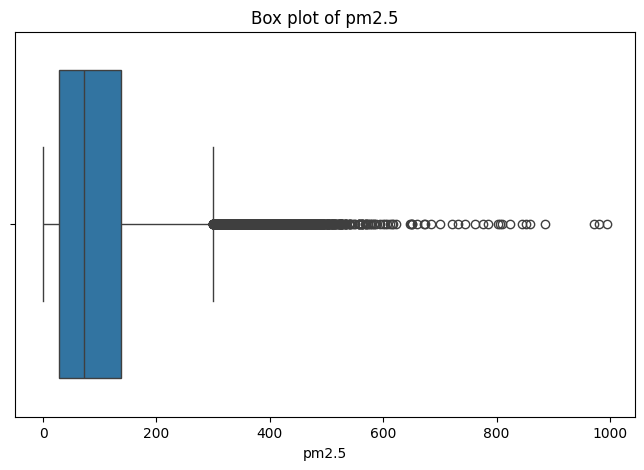

In [ ]:
# Dibujemos un box plot para visualizar la tendencia central y dispersi√≥n de PRES
plt.figure(figsize=(8, 5))
g = sns.boxplot(data=df['pm2.5'], orient='h')
g.set_title('Box plot of pm2.5')
plt.show()

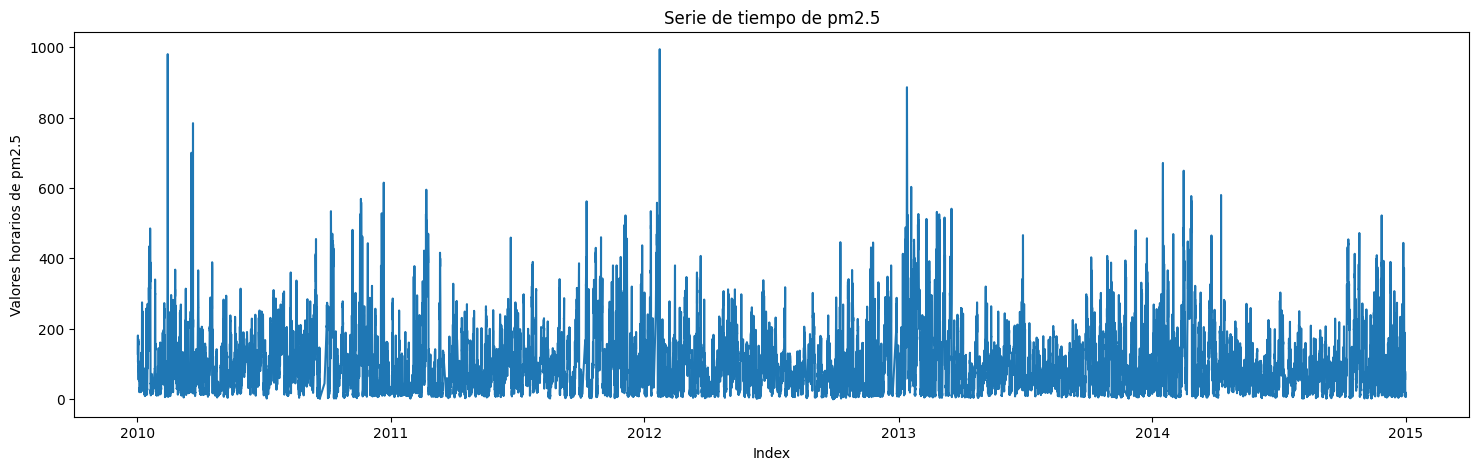

In [ ]:
plt.figure(figsize=(18, 5))
g = sns.lineplot(x=df['datetime'], y=df['pm2.5'])
g.set_title('Serie de tiempo de pm2.5')
g.set_xlabel('Index')
g.set_ylabel('Valores horarios de pm2.5')
#plt.savefig('B07887_05_10.png', format='png', dpi=300)
plt.show()

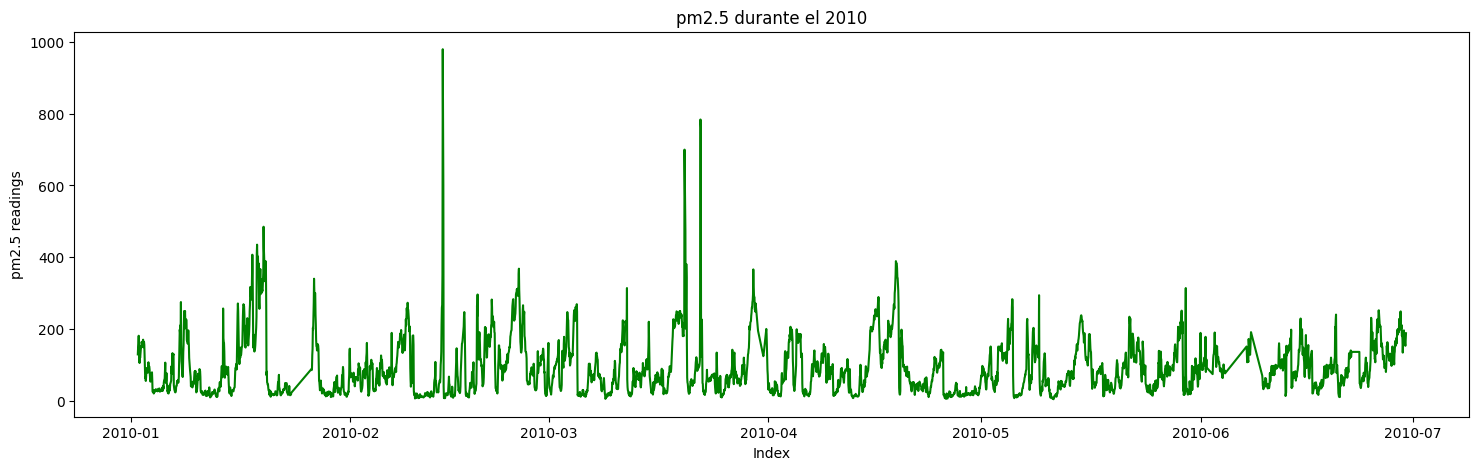

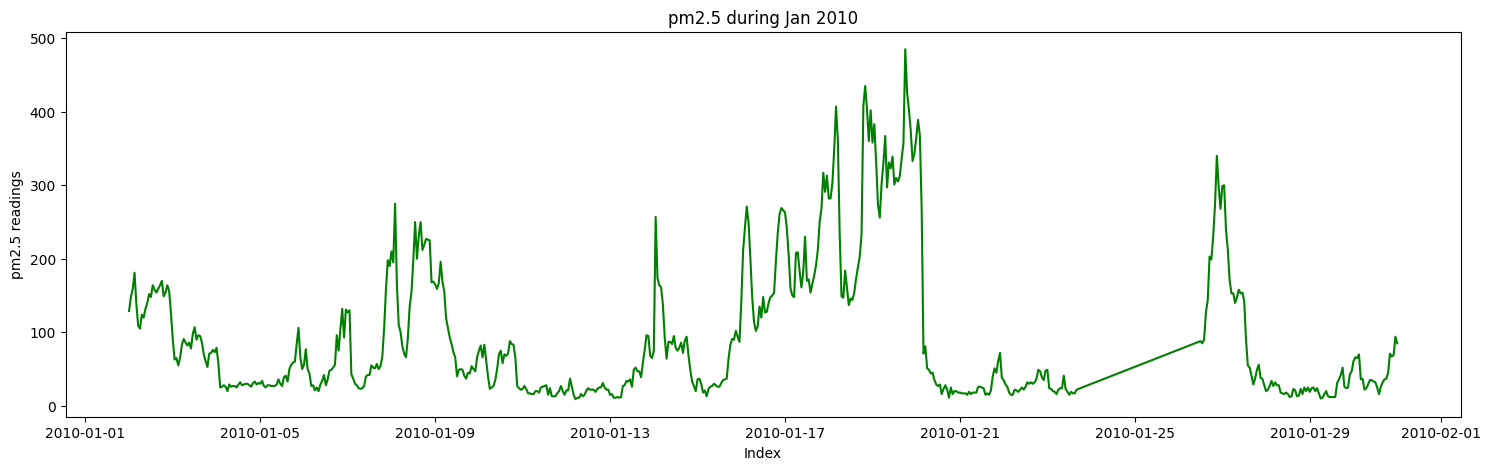

In [ ]:
# Grafiquemos una serie de tiempo de 6 meses y veamos patrones.
plt.figure(figsize=(18, 5))
g = sns.lineplot(x=df['datetime'], y=df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 durante el 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')
# plt.savefig('B07887_05_07.png', format='png', dpi=300)
plt.show()

#Let's zoom in on one month.
plt.figure(figsize=(18, 5))
g = sns.lineplot(x=df['datetime'], y=df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')
# plt.savefig('B07887_05_08.png', format='png', dpi=300)
plt.show()

### Etapa 2 Preprocesamiento de la data
<p style='text-align: justify;'>
En esta segunda etapa preparamos los datos con el objetivo de realizar un entrenamiento robusto de nuestra red neuronal. Usualmente los datos como primera etapa se normalizan. Empiricamente se ha observando que los datos normalizados (No siempre) generan modelos de clasificiaci√≥n y de regresi√≥n con mejores metricas que los no nromalizadas. Por otra parte, Los algoritmos de descenso de gradiente funcionan mejor (por ejemplo, convergen m√°s r√°pido) si las variables est√°n dentro del rango [-1, 1]. Muchas fuentes relajan el l√≠mite incluso [-3, 3].</p>
<p style='text-align: justify;'>
Posteriormente los datos debens ser separados en tres conjuntos: Entrenamiento, validaci√≥n y test. Usualmente el ultimo de test se utiliza con una prueba nueva de datos. Finalmente debemos construir el conjunto de vectores que ser√°n utilizados para entrenar la red neuronal perceptron multicapa. Las librerias. Adicionalmente en esta secci√≥n utilizaremos la librer√≠a sklearn para realizar la normalizaci√≥n.
</p>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

<p style='text-align: justify;'>
Antes de entrenar el modelo, el conjunto de datos se divide en dos partes: conjunto de entrenamiento y conjunto de validaci√≥n.
La red neuronal se entrena en el conjunto de entrenamiento. Esto significa el c√°lculo de la funci√≥n de p√©rdida, backpropagation
y los pesos actualizados por un algoritmo de descenso de gradiente se realizan en el conjunto de entrenamiento. El conjunto de validaci√≥n se utiliza para evaluar el modelo y para determinar el n√∫mero de epochs en el entrenamiento del modelo. Aumentando el n√∫mero de epochs disminuir√°n a√∫n m√°s la funci√≥n de p√©rdida en el conjunto de entrenamiento, pero es posible que no necesariamente tengan el mismo efecto para el conjunto de validaci√≥n debido al sobreajuste en el conjunto de entrenamiento. Utilizamos Keras con el backend Tensorflow para definir y entrenar el modelo. Todos los pasos involucrados en la capacitaci√≥n y validaci√≥n del modelo se realizan llamando a las funciones apropiadas de la API de Keras.
 </p>

In [ ]:
"""
Comencemos dividiendo el conjunto de datos en entrenamiento y validaci√≥n. El per√≠odo de tiempo del conjunto de datos si es de
1 de enero de 2010 al 31 de diciembre de 2014. Los primeros cuatro a√±os: 2010 a 2013 se utiliza como entrenamiento y
2014 se mantiene para validaci√≥n.
"""
# Utilizamos pandas para realizar este proceso.
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [ ]:
#Miremos nuestro conjunto de entrenamiento
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir  \
0  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0   
1  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0   
2  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0   
3  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0   
4  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0   

             datetime  scaled_pm2.5  
0 2010-01-02 00:00:00      0.129779  
1 2010-01-02 01:00:00      0.148893  
2 2010-01-02 02:00:00      0.159960  
3 2010-01-02 03:00:00      0.182093  
4 2010-01-02 04:00:00      0.138833

In [ ]:
#Miremos nuestro conjunto de validaci√≥n
df_val.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
33096  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
33097  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
33098  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
33099  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
33100  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_pm2.5  
33096   0   0 2014-01-01 00:00:00      0.024145  
33097   0   0 2014-01-01 01:00:00      0.053320  
33098   0   0 2014-01-01 02:00:00      0.065392  
33099   0   0 2014-01-01 03:00:00      0.070423  
33100   0   0 2014-01-01 04:00:00      0.079477

In [ ]:
#Vamos a resetar los indices para ser ordenados
df_val.reset_index(drop=True, inplace=True)

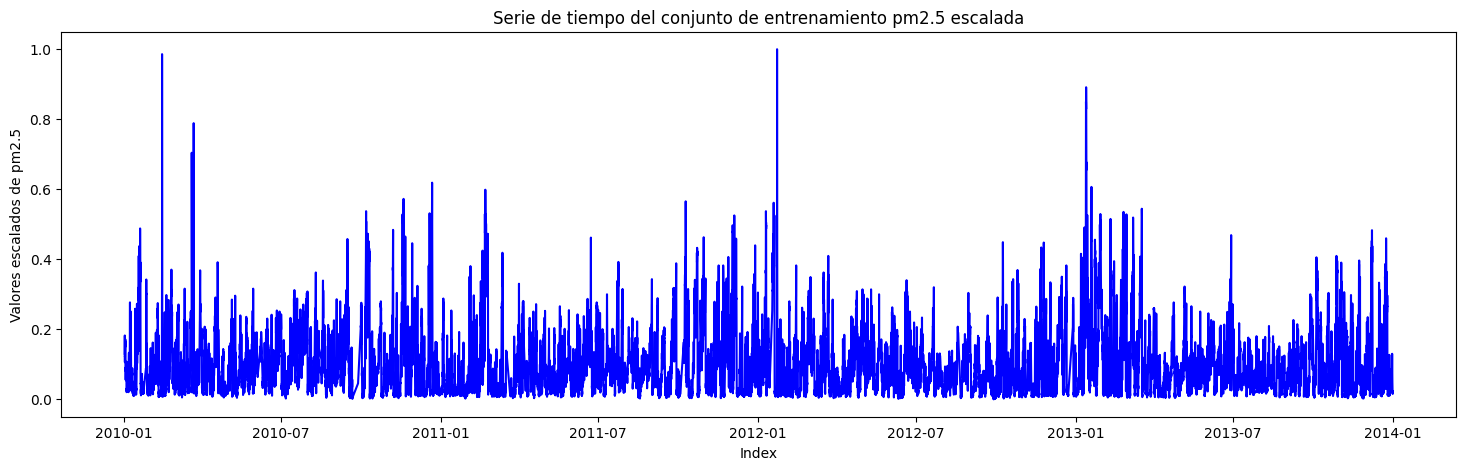

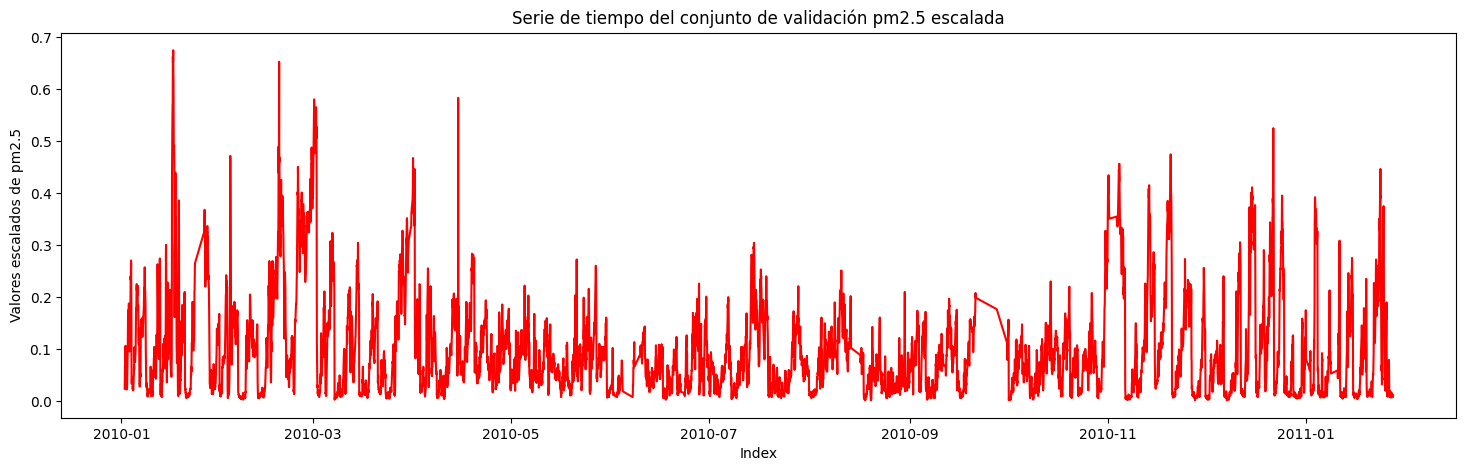

In [ ]:
"""
El conjunto de entrenamiento y validaci√≥n lo volvemos a dibujar.
"""

plt.figure(figsize=(18, 5))
g = sns.lineplot(x=df['datetime'], y=df_train['scaled_pm2.5'], color='b')
g.set_title('Serie de tiempo del conjunto de entrenamiento pm2.5 escalada')
g.set_xlabel('Index')
g.set_ylabel('Valores escalados de pm2.5')
plt.show()

plt.figure(figsize=(18, 5))
g = sns.lineplot(x=df['datetime'], y=df_val['scaled_pm2.5'], color='r')
g.set_title('Serie de tiempo del conjunto de validaci√≥n pm2.5 escalada')
g.set_xlabel('Index')
g.set_ylabel('Valores escalados de pm2.5')
plt.show()

<p style='text-align: justify;'>
Ahora necesitamos generar vectores (X) y una variable objetivo (y) para entrenar y validar. La matriz de los regresores o variables independientes y la matriz  de la variable dependiente se crean a partir de la matriz 1-D original de la columna scaled_pm2.5. Para el modelo de pron√≥stico de series de tiempo, los √∫ltimos siete d√≠as de observaciones se utilizan para predecir el d√≠a siguiente, este valor se estudia y se pueden ejercitar distintas ventanas de tiempo. el dia 7 surge de la observaci√≥n de los gr√°ficos de linea.  Definimos una funci√≥n que toma la serie de tiempo original y el n√∫mero de pasos de tiempo en los regresores como entrada para generar las matrices de X e y. </p>

In [ ]:
def makeXy(ts, nb_timesteps):
    """
    Input:
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output:
           X: 2-D array of regressors
           y: 1-D array of target
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [ ]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [ ]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


### Definiendo el modelo de 1D-CNN
<p style='text-align: justify;'>
    
Comprendamos c√≥mo funciona la convoluci√≥n 1D. Considere la siguiente figura que muestra una serie de tiempo de diez pasos de tiempo. Un filtro (1 x -1) + (2x1) + (-1 x 2) = -1 se mueve un paso de una unidad de tiempo sobre la serie. Por lo tanto, se genera un mapa de caracter√≠sticas 1 x 8. El primer elemento de la
el mapa de caracter√≠sticas se calcula como se mostr√≥ anteriormente. El resto de los pasos de tiempo se calculan de manera similar. No hemos rellenado con ceros la serie de tiempo original (Padding), por lo que el mapa de caracter√≠sticas es dos unidades m√°s corto que la serie original. Sin embargo, rellenar con cero el inicio y el final de la serie de tiempo de entrada y usar el mismo filtro habr√≠a resultado en un mapa de caracter√≠sticas 1 x 10. Adicionalmente Una capa de agrupaci√≥n se puede apilar con la capa convolucional para reducir la muestra del mapa de caracter√≠sticas.</p>



![1D-convolucional](https://drive.google.com/uc?export=view&id=1s2Uc3QfrW6Cxf5GB391VvHqnCBmbuT2L)


<p style='text-align: justify;'>
El enfoque de usar un filtro de convoluci√≥n 1 x 3 es equivalente a entrenar varios modelos locales autorregresivos de orden tres. Estos modelos locales generan caracter√≠sticas sobre subconjuntos a corto plazo de las series de tiempo de entrada. Cuando se usa una capa de agrupaci√≥n promedio despu√©s de 1D capa de convoluci√≥n, crea promedios m√≥viles sobre el mapa de entidades generado por la capa de convoluci√≥n anterior. Adem√°s, varias capas de convoluci√≥n y agrupaci√≥n 1D, cuando se apilan entre s√≠, brindan una forma poderosa de extraer caracter√≠sticas de la serie de tiempo original. Por lo tanto, el uso de CNNs resulta ser efectivo cuando se trata de series de tiempo complejas y no lineales, como ondas de audio, habla, etc. De hecho, las CNN se han aplicado con √©xito en la clasificaci√≥n de ondas de audio. </p>



### Un ejemplo con Keras


![Acelerometro](https://drive.google.com/uc?export=view&id=1fHzzgEwQgZfHwixQX4OUuu79sSik-fdj)


En este ejemplo, nos enfocaremos en los datos del sensor de aceler√≥metro de tiempo reducido que provienen de un tel√©fono inteligente que llevan sus usuarios en la cintura. Seg√∫n los datos del aceler√≥metro de los ejes x, y y z, la CND 1D debe predecir el tipo de actividad que realiza un usuario (como "Caminar", "Trotar" o "Pararse").



![1D-convolucional](https://drive.google.com/uc?export=view&id=1B9qtmqNTDUBNzHe5nz0eawKt9AnJcX-G)




```python
model_m = Sequential() # Aqui vamos a apilar capas.
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())
```

__Datos de entrada__: los datos se han preprocesado de tal manera que cada registro de datos contiene 80 segmentos de tiempo. Dentro de cada intervalo de tiempo, se almacenan los tres valores para el eje x, el eje y y el eje z. Esto da como resultado una matriz de 80 x 3. La linea `Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))` tiene por objetivo transformar de un vector de 240 a un tensor 80x3.


__Primera capa 1D-CNN__: La primera capa define un filtro (o tambi√©n llamado detector de caracter√≠sticas) para este caso de altura 10 (tambi√©n llamado tama√±o kernel). Solo definir un filtro permitir√≠a a la red neuronal aprender una sola caracter√≠stica en la primera capa. Esto podr√≠a no ser suficiente, por lo tanto, definiremos 100 filtros. Esto nos permite entrenar 100 caracter√≠sticas diferentes en la primera capa de la red. La salida de la primera capa de red neuronal es una matriz de 71 x 100 neuronas. Cada columna de la matriz de salida contiene los valores obtenidos de aplicar un solo filtro. Con el tama√±o del kernel definido y considerando la longitud de la matriz de entrada, cada filtro generar√° 71 valores.


__Segunda capa 1D-CNN__: El resultado de la primera CNN se introducir√° en la segunda capa de CNN. Nuevamente definiremos 100 filtros diferentes para ser entrenados en este nivel. Siguiendo la misma l√≥gica que la primera capa, la matriz de salida tendr√° un tama√±o de 62 x 100.

__Capa max pooling__: A menudo se usa una capa de agrupaci√≥n despu√©s de una capa CNN para reducir la complejidad de la salida y evitar el sobreajuste de los datos. En nuestro ejemplo elegimos un tama√±o de tres. Esto significa que el tama√±o de la matriz de salida de esta capa es solo un tercio de la matriz de entrada.

__3ra y  4ta capas 1D-CNN__: Sigue otra secuencia de capas 1D CNN para aprender caracter√≠sticas de nivel superior. La matriz de salida despu√©s de esas dos capas es una matriz de 2x160.

__Capa average polling__: Una capa de agrupaci√≥n m√°s para evitar a√∫n m√°s el sobreajuste. Esta vez no se toma el valor m√°ximo, sino el valor promedio de dos pesos dentro de la red neuronal. La matriz de salida tiene un tama√±o de 1x160 neuronas. Por detector de caracter√≠sticas solo queda un peso en la red neuronal en esta capa.

__Capa dropout__: La capa de abandono asignar√° aleatoriamente 0 pesos a las neuronas en la red. Como elegimos una tasa de 0.5, el 50% de las neuronas recibir√°n un peso cero. Con esta operaci√≥n, la red se vuelve menos sensible para reaccionar a variaciones m√°s peque√±as en los datos. Por lo tanto, deber√≠a aumentar a√∫n m√°s nuestra precisi√≥n en datos no vistos. La salida de esta capa sigue siendo una matriz de neuronas 1 x 160.

__Capa fully connected__: La capa final reducir√° el vector de altura 160 a un vector de seis, ya que tenemos seis clases que queremos predecir ("trotar", "sentado", "caminar", "de pie", "arriba", "abajo") . Esta reducci√≥n se realiza mediante otra multiplicaci√≥n de matriz. Softmax se utiliza como la funci√≥n de activaci√≥n. Obliga a las seis salidas de la red neuronal a sumar una. Por lo tanto, el valor de salida representar√° la probabilidad para cada una de las seis clases.

### El ejemplo de pm2.5
El tensor de entrada a las capas de convoluci√≥n debe tener forma (n√∫mero de muestras, n√∫mero de pasos de tiempo, n√∫mero de caracter√≠sticas por paso de tiempo). En este caso, estamos modelando solo pm2.5, por lo tanto, el n√∫mero de caracter√≠sticas por paso de tiempo es uno. El n√∫mero de pasos de tiempo es siete y el n√∫mero de muestras es igual al n√∫mero de muestras en X_train y X_val, que se reforman en matrices 3D.

In [ ]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),\
                 X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Forma de la matriz despu√©s del reshaping:', X_train.shape, X_val.shape)

Forma de la matriz despu√©s del reshaping: (33089, 7, 1) (8654, 7, 1)


Ahora vamos a definir una topologia con capas 1D-CNN para el data set pm2.5.

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten
from tensorflow.keras.layers import ZeroPadding1D, Conv1D, AveragePooling1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
# Defina la capa de entrada que recibe tensores (x,7,1).
input_layer = Input(shape=(7,1), dtype='float32')

La capa ZeroPadding1D se agrega a continuaci√≥n para agregar ceros al principio y al final de cada serie. El relleno cero asegura que la capa de convoluci√≥n aguas abajo no reduzca la dimensi√≥n de las secuencias de salida. Capa de agrupaci√≥n, agregada despu√©s de que la capa de convoluci√≥n se usa para reducir el muestreo de la entrada.

In [ ]:
# Agregamos cero padding
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)

El primer argumento de Conv1D es la cantidad de filtros, que determinan la cantidad de caracter√≠sticas en la salida. El segundo argumento indica la longitud de la ventana (kernel) de convoluci√≥n 1D. El tercer argumento son los pasos y representan el n√∫mero de lugares para cambiar la ventana de convoluci√≥n. Por √∫ltimo, estableciendo use_bias como True, agregue un valor de sesgo durante el c√°lculo de una funci√≥n de salida. Aqu√≠, se puede pensar que la convoluci√≥n 1D genera modelos AR locales sobre una ventana m√≥vil de tres unidades de tiempo.

In [ ]:
# A√±adimos una capa 1D convolution.
# Se crean 64 m√°scaras de tama√±o 3. Se inicializan de forma aleatoria y cambian con el
# entrenamiento
conv1D_layer1 = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
conv1D_layer2 = Conv1D(32, 3, strides=1, use_bias=True)(conv1D_layer1)

Se agrega AveragePooling1D al lado de reducir la entrada al tomar el promedio sobre el tama√±o de la agrupaci√≥n de tres con pasos de un paso de tiempo. La agrupaci√≥n promedio en este caso puede considerarse como tomar promedios m√≥viles sobre una ventana m√≥vil de tres unidades de tiempo. Hemos utilizado la agrupaci√≥n promedio en lugar de la agrupaci√≥n m√°xima para generar los promedios m√≥viles.

In [ ]:
# Agregamos capa AveragePooling1D.
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)

La capa de agrupaci√≥n anterior devuelve la salida 3D. Por lo tanto, antes de pasar a la capa de salida, se agrega una capa Flatten. La capa Flatten cambia la forma de la entrada a (n√∫mero de muestras, n√∫mero de pasos de tiempo * n√∫mero de caracter√≠sticas por paso de tiempo), que luego se alimenta a la capa de salida

In [ ]:
#Agregamos capa  Flatten.
flatten_layer = Flatten()(avgpooling_layer)

In [ ]:
# Una capa densa.
dense_layer1 = Dense(32)(flatten_layer)
# Una de dropout
dropout_layer = Dropout(0.2)(dense_layer1)
# Otra capa densa.
dense_layer2 = Dense(16)(dropout_layer)
# Otra de dropout
dropout_layer = Dropout(0.2)(dense_layer2)

In [ ]:
# Finalmente, la capa de salida da predicciones para la presi√≥n de aire del d√≠a siguiente.
output_layer = Dense(1, activation='linear')(dropout_layer)

Las capas de entrada, densa y de salida ahora se empaquetar√°n dentro de un Modelo, que es una clase de envoltura para entrenamiento y creaci√≥n. El diagrama de caja de pm2.5 muestra la presencia de valores at√≠picos. Por lo tanto, usaremos el __error absoluto medio (MAE)__  como m√©trica, ya que las desviaciones absolutas sufren menos fluctuaciones en comparaci√≥n con las desviaciones al cuadrado.

Los pesos de la red est√°n optimizados por el algoritmo Adam. Adam representa la estimaci√≥n del momento adaptativo y ha sido una opci√≥n popular para entrenar redes neuronales profundas. A diferencia del descenso de gradiente estoc√°stico, Adam usa diferentes tasas de aprendizaje para cada peso y se actualizan por separado. Conforme el entrenamiento progresa, la tasa de aprendizaje de un peso se actualiza con base en promedios m√≥viles ponderados exponencialmente de los gradientes del peso y los gradientes al cuadrado.

In [ ]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)        ‚îÇ (None, 7, 1)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ zero_padding1d (ZeroPadding1D)  ‚îÇ (None, 9, 1)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d (Conv1D)                 ‚îÇ (None, 7, 64)          ‚îÇ           256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_1 (Conv1D)               ‚îÇ (None, 5, 32)          ‚îÇ         6,176 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ average_pooling1d               ‚îÇ (None, 3, 32)          ‚îÇ             0 ‚îÇ
‚îÇ (AveragePooling1D)              ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 96)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 32)             ‚îÇ         3,104 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 32)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 16)             ‚îÇ           528 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)             ‚îÇ (None, 16)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            17 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 10,081 (39.38 KB)

 Trainable params: 10,081 (39.38 KB)

 Non-trainable params: 0 (0.00 B)

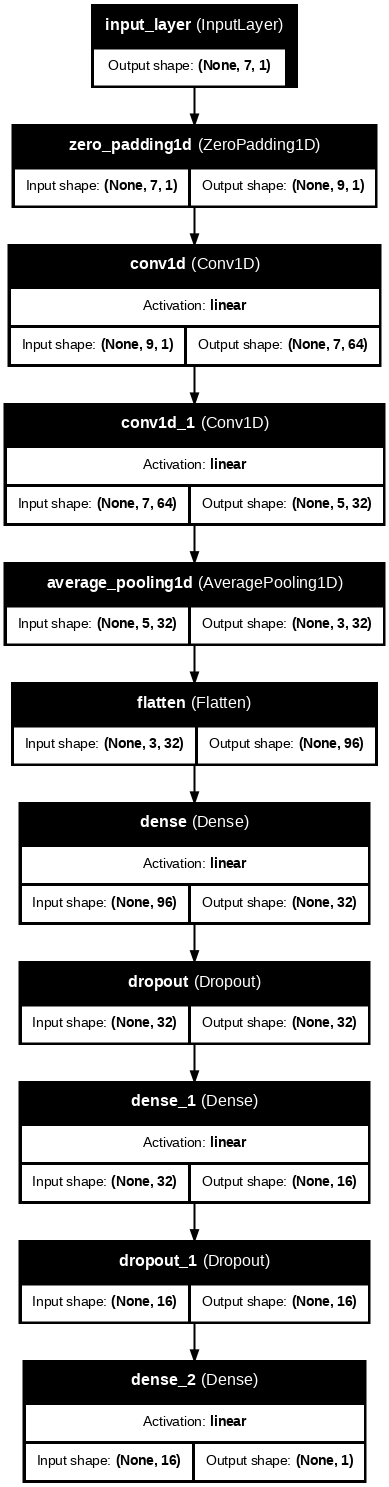

In [ ]:
from tensorflow.keras.utils import plot_model


plot_model(ts_model,
           to_file='model_plot.png',
           show_shapes=True,
           show_layer_names=True,
           dpi=72,
           layer_range=None,
           show_layer_activations=True
           )

El modelo se entrena llamando a la funci√≥n de ajuste en el objeto modelo y pasando el X_train y el y_train. El entrenamiento
se realiza para un n√∫mero predefinido de epochs. Adem√°s, batch_size define el n√∫mero de muestras del conjunto de entrenamiento para ser utilizado para una instancia de backpropagation. El conjunto de datos de validaci√≥n tambi√©n se pasa para evaluar el modelo despu√©s de cada epoch es completado. Un objeto ModelCheckpoint rastrea la funci√≥n de p√©rdida en el conjunto de validaci√≥n y guarda el modelo para la epoch, en el cual la funci√≥n de p√©rdida ha sido m√≠nima.

In [ ]:
path = "/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 7"
save_weights_at = os.path.join(path+'/keras_models', 'PRSA_data_PM2.5_1DConv_weights.{epoch:02d}-{val_loss:.4f}.keras')
save_best = ModelCheckpoint(save_weights_at,
                            monitor='val_loss',
                            verbose=0,
                            save_best_only=True,
                            save_weights_only=False,
                            mode='min',
                            save_freq='epoch')

ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 3ms/step - loss: 0.0251 - val_loss: 0.0182
Epoch 2/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 3ms/step - loss: 0.0198 - val_loss: 0.0147
Epoch 3/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 4ms/step - loss: 0.0188 - val_loss: 0.0169
Epoch 4/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 3ms/step - loss: 0.0189 - val_loss: 0.0137
Epoch 5/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 3ms/step - loss: 0.0192 - val_loss: 0.0158
Epoch 6/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 3ms/step - loss: 0.0185 - val_loss: 0.0147
Epoch 7/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - loss: 0.0189 - val_loss: 0.0153
Epoch 8/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 3ms/step - loss:

## <font color='green'>**Actividad 1**</font>

Proponga, construya y entrene su propia red neuronal. (40 Minutos)

In [ ]:
input_layer = Input(shape=(7,1), dtype='float32')

x = ZeroPadding1D(padding=2)(input_layer)
x = Conv1D(48, 5, activation='relu')(x)
x = ZeroPadding1D(padding=1)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = AveragePooling1D(pool_size=3, strides=2)(x)

x = Conv1D(32, 1, activation='linear')(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(1, activation='linear')(x)


In [ ]:
custom_model = Model(inputs=input_layer, outputs=output_layer)
custom_model.compile(loss='mean_absolute_error', optimizer='adam')
custom_model.summary()

Model: "functional_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1 (InputLayer)      ‚îÇ (None, 7, 1)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ zero_padding1d_1                ‚îÇ (None, 11, 1)          ‚îÇ             0 ‚îÇ
‚îÇ (ZeroPadding1D)                 ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_2 (Conv1D)               ‚îÇ (None, 7, 48)          ‚îÇ           288 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ zero_padding1d_2                ‚îÇ (None, 9, 48)          ‚îÇ             0 ‚îÇ
‚îÇ (ZeroPadding1D)                 ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_3 (Conv1D)               ‚îÇ (None, 7, 64)          ‚îÇ         9,280 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ average_pooling1d_1             ‚îÇ (None, 3, 64)          ‚îÇ             0 ‚îÇ
‚îÇ (AveragePooling1D)              ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_4 (Conv1D)               ‚îÇ (None, 3, 32)          ‚îÇ         2,080 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 3, 32)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_1 (Flatten)             ‚îÇ (None, 96)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 64)             ‚îÇ         6,208 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 64)            

 Total params: 19,969 (78.00 KB)

 Trainable params: 19,969 (78.00 KB)

 Non-trainable params: 0 (0.00 B)

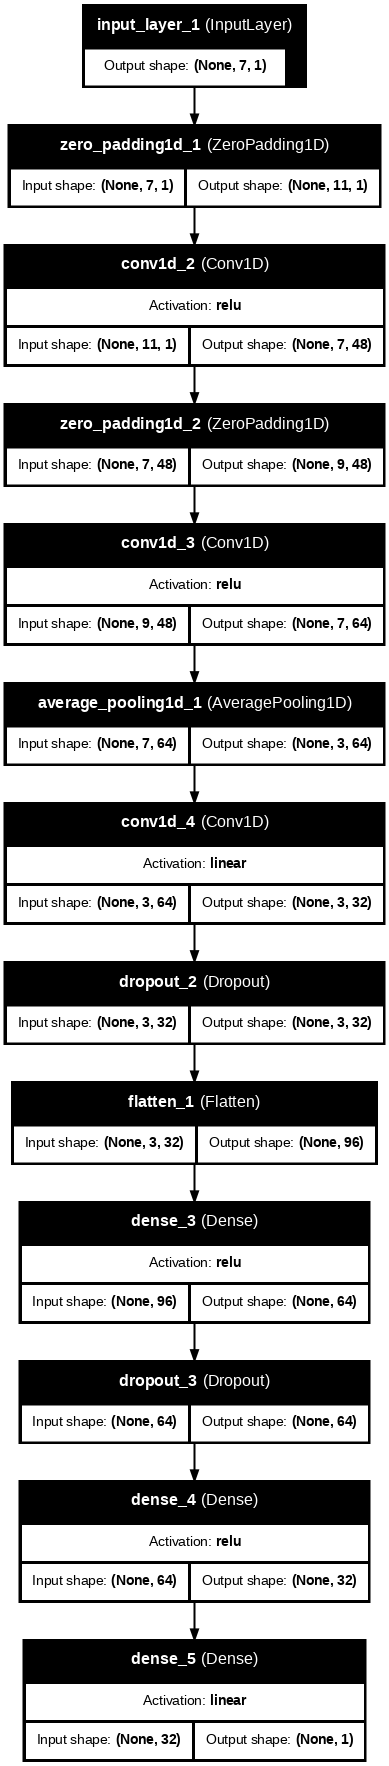

In [ ]:
plot_model(custom_model,
           to_file='custom_model_plot.png',
           show_shapes=True,
           show_layer_names=True,
           dpi=72,
           layer_range=None,
           show_layer_activations=True
           )

In [ ]:
custom_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 4ms/step - loss: 0.0237 - val_loss: 0.0160
Epoch 2/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 4ms/step - loss: 0.0168 - val_loss: 0.0176
Epoch 3/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 4ms/step - loss: 0.0159 - val_loss: 0.0184
Epoch 4/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 4ms/step - loss: 0.0157 - val_loss: 0.0158
Epoch 5/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 4ms/step - loss: 0.0153 - val_loss: 0.0213
Epoch 6/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 5ms/step - loss: 0.0154 - val_loss: 0.0198
Epoch 7/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 4ms/step - loss: 0.0153 - val_loss: 0.0163
Epoch 8/20
2069/2069 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 5ms/step - loss

<font color='green'>Fin Actividad 1</font>

## <font color='green'>**Actividad 2**</font>

Evalue el resultado del modelo (30 minutos). Utilice
1. MAE
2. $R^2$
3. Gr√°fico de l√≠nea.

1035/1035 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 1ms/step
271/271 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
## Resultados de evaluaci√≥n üìä
MAE entrenamiento: 0.0143
MAE validaci√≥n: 0.0128
---
R¬≤ entrenamiento: 0.9162
R¬≤ validaci√≥n: 0.9392


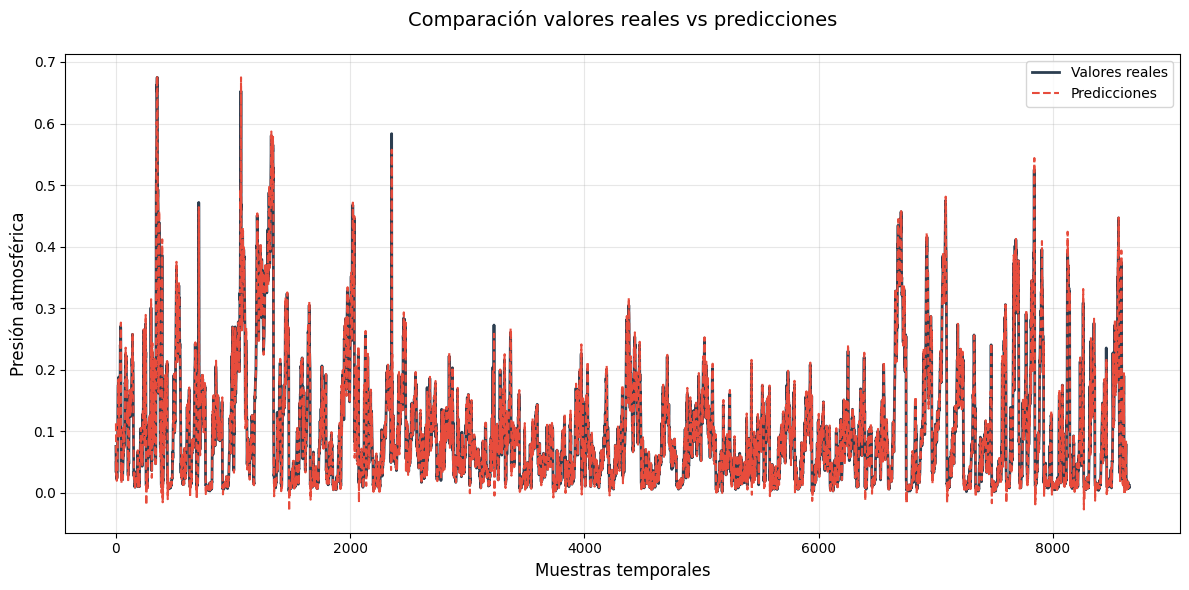

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

best_model = load_model('/content/drive/MyDrive/DATA SCIENCE UDD 2024/MODULO 7/keras_models/PRSA_data_PM2.5_1DConv_weights.17-0.0128.keras')  # Asumiendo que save_best usa este nombre

# prediccion y metricas
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

print("## Resultados de evaluaci√≥n üìä")
print(f"MAE entrenamiento: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"MAE validaci√≥n: {mean_absolute_error(y_val, y_val_pred):.4f}")
print("---")
print(f"R¬≤ entrenamiento: {r2_score(y_train, y_train_pred):.4f}")
print(f"R¬≤ validaci√≥n: {r2_score(y_val, y_val_pred):.4f}")

# grafico de linea
plt.figure(figsize=(12, 6))
plt.plot(y_val, label='Valores reales', color='#2c3e50', linewidth=2)
plt.plot(y_val_pred, label='Predicciones', color='#e74c3c', linestyle='--')
plt.title('Comparaci√≥n valores reales vs predicciones', fontsize=14, pad=20)
plt.xlabel('Muestras temporales', fontsize=12)
plt.ylabel('Presi√≥n atmosf√©rica', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<font color='green'>Fin Actividad 2</font>

# <font color='purple' style='bold' size=5>**MATERIAL ADICIONAL** </font>
Introducci√≥n a las librer√≠as TensorFlow y Keras de OpenWebinars
## [Introducci√≥n a TensorFlow y Keras: Fundamentos y ejemplos](https://openwebinars.net/blog/tensorflow-keras-fundamentos/)


## <font color='purple' style='bold' size=3>**FIN MATERIAL ADICIONAL** </font>

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='red'>**Series de tiempos multivariadas y CNN.**</font>

**Clasificador de Series Temporales Multivariadas con Redes Convolucionales**

Las redes convolucionales no est√°n reservadas exclusivamente para la clasificaci√≥n de im√°genes. De hecho, pueden ser una herramienta eficaz para el an√°lisis de series temporales, especialmente cuando se trata de series temporales multivariadas donde diferentes variables evolucionan con el tiempo.

En este ejercicio, se le desaf√≠a a construir un clasificador para una serie temporal multivariada utilizando redes convolucionales:

1. Genere una serie temporal multivariada ficticia. Por simplicidad, esta serie temporal puede tener dos clases: clase A y clase B. (Puede usar funciones senoidales, cosenoidales y a√±adir ruido para diferenciar entre las dos clases).

2. Divida el conjunto de datos en entrenamiento y prueba.

3. Dise√±e una red neuronal convolucional que pueda recibir la serie temporal multivariada y clasificarla en una de las dos clases.

4. Entrene el modelo y eval√∫e su precisi√≥n en el conjunto de prueba.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten
from sklearn.model_selection import train_test_split

# 1. Generaci√≥n de serie temporal multivariada ficticia
np.random.seed(42)
timesteps = 100
data_size = 1000

# Funciones senoidales y cosenoidales con ruido
class_A = np.array([np.sin(np.linspace(0, 10, timesteps)) + np.random.normal(0, 0.2, timesteps) for _ in range(data_size)])
class_B = np.array([np.sin(np.linspace(0, 10, timesteps)) + np.random.normal(0, 0.5, timesteps) for _ in range(data_size)])

X = np.vstack([class_A, class_B])
y = np.array([0] * data_size + [1] * data_size)

# 2. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# 3. Dise√±o de la red neuronal convolucional
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(timesteps, 1)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 4. Entrenar y evaluar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {score[1]*100:.2f}%")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 14ms/step - accuracy: 0.8473 - loss: 0.4216 - val_accuracy: 1.0000 - val_loss: 0.0357
Epoch 2/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0233 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 3/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 4/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 5/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 6/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
5

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split

# 1. Generaci√≥n de serie temporal multivariada ficticia
np.random.seed(42)
timesteps = 100
data_size = 1000
num_features = 2  # n√∫mero de variables en la serie temporal

# Crear series de tiempo multivariadas para ambas clases
class_A = np.array([np.column_stack([np.sin(np.linspace(0, 10, timesteps)) + np.random.normal(0, 0.2, timesteps),
                                     np.cos(np.linspace(0, 10, timesteps)) + np.random.normal(0, 0.2, timesteps)])
                    for _ in range(data_size)])

class_B = np.array([np.column_stack([np.sin(np.linspace(0, 10, timesteps)) + np.random.normal(0, 0.5, timesteps),
                                     np.cos(np.linspace(0, 10, timesteps)) + np.random.normal(0, 0.5, timesteps)])
                    for _ in range(data_size)])

X = np.vstack([class_A, class_B])
y = np.array([0] * data_size + [1] * data_size)

# 2. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Dise√±o de la red neuronal convolucional
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(timesteps, num_features)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 4. Entrenar y evaluar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {score[1]*100:.2f}%")


Epoch 1/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 22ms/step - accuracy: 0.7924 - loss: 0.4356 - val_accuracy: 1.0000 - val_loss: 0.0347
Epoch 2/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0225 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 3/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 4/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/10
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0013
E

# <font color='purple' style='bold' size=5>**REFLEXION GRUPAL** </font>

**Reflexi√≥n Grupal: Deep Learning**


Durante este m√≥dulo, hemos profundizado en el deep learning, una de las ramas m√°s avanzadas y potentes del machine learning, que utiliza redes neuronales con m√∫ltiples capas para modelar relaciones complejas en los datos. Cada sesi√≥n del curso nos permiti√≥ explorar desde los fundamentos te√≥ricos hasta aplicaciones pr√°cticas avanzadas que integran t√©cnicas modernas de redes neuronales, reforzando nuestra capacidad para crear modelos capaces de extraer patrones complejos de diversos tipos de datos.

**1. Fundamentos y Aprendizaje Lineal**


En las primeras clases nos introdujimos en el mundo del deep learning a trav√©s de la motivaci√≥n y los conceptos fundamentales. La presentaci√≥n DL00-Motivaci√≥n nos ofreci√≥ una visi√≥n panor√°mica de la importancia y aplicaciones del deep learning en diversos campos. Con DL01-Aprendizaje_Lineal-Deconstrucci√≥n, analizamos c√≥mo los modelos lineales constituyen la base sobre la cual se construyen las redes neuronales m√°s complejas, comprendiendo la naturaleza del aprendizaje param√©trico y c√≥mo este se puede optimizar.


**2. Tensores y Construcci√≥n de Redes Neuronales con PyTorch**
La Clase 2 se centr√≥ en los fundamentos pr√°cticos para implementar soluciones de deep learning:
Con DL02-Tensores_Pytorch, aprendimos a trabajar con la estructura de datos fundamental del deep learning moderno: los tensores. Estos objetos multidimensionales nos permitieron representar y manipular datos de forma eficiente para su procesamiento en redes neuronales.
En DL03-Red_Neuronal_Pytorch, dimos el salto a la implementaci√≥n de arquitecturas neuronales completas, comprendiendo c√≥mo conectar capas, definir funciones de activaci√≥n y estructurar modelos para diferentes tipos de problemas.
Estos conocimientos resultaron esenciales para desarrollar soluciones pr√°cticas, estableciendo la base t√©cnica necesaria para implementaciones m√°s avanzadas.

**3. Entrenamiento y Optimizaci√≥n**

La Clase 3, con DL04-Entrenamiento_Pytorch, nos adentr√≥ en las t√©cnicas espec√≠ficas para entrenar redes neuronales:
Exploramos los algoritmos de optimizaci√≥n como SGD y Adam, comprendiendo sus ventajas y aplicaciones seg√∫n el tipo de problema.
Analizamos las funciones de p√©rdida y su importancia para guiar el aprendizaje de nuestros modelos hacia soluciones √≥ptimas.
Estudiamos t√©cnicas para ajustar hiperpar√°metros como la tasa de aprendizaje, el momentum y el tama√±o de batch, elementos cr√≠ticos para obtener modelos eficientes y precisos.

**4. Validaci√≥n, Regularizaci√≥n y Aplicaciones Pr√°cticas**

En la Clase 4 avanzamos hacia t√©cnicas fundamentales para mejorar el rendimiento y la generalizaci√≥n de nuestros modelos:
En DL05-Validacion_Dropout_Pytorch, aprendimos a implementar t√©cnicas de regularizaci√≥n como Dropout para prevenir el sobreajuste, as√≠ como m√©todos de validaci√≥n para evaluar correctamente el desempe√±o de nuestros modelos en datos no vistos.
Con DL06-PM2.5_Prediccion_MLP, aplicamos estos conocimientos a un caso real: la predicci√≥n de niveles de contaminaci√≥n PM2.5 mediante redes neuronales multicapa, integrando datos complejos en un modelo capaz de realizar predicciones valiosas en un contexto de salud ambiental.

**5. Clasificaci√≥n y Filtros Convolucionales**

La Clase 5 nos introdujo en nuevas aplicaciones y en los fundamentos de las redes convolucionales:
DL07-Clasificaci√≥n de un Sonar nos permiti√≥ aplicar redes neuronales a problemas de clasificaci√≥n binaria con datos de sonar, un caso pr√°ctico que demuestra la versatilidad de estas t√©cnicas.
Con DL08-Filtros_Convolucionales comenzamos nuestro recorrido por las Redes Neuronales Convolucionales (CNN), comprendiendo c√≥mo los filtros convolucionales pueden detectar caracter√≠sticas locales en datos estructurados, especialmente en im√°genes.

**6. Profundizando en Redes Convolucionales**

La Clase 6 expandi√≥ nuestro conocimiento sobre los componentes fundamentales de las CNNs:
En DL09-Kernels, estudiamos en profundidad los kernels convolucionales, entendiendo c√≥mo diferentes tipos de filtros pueden detectar bordes, texturas y otras caracter√≠sticas visuales esenciales.
Con DL10-Capa_Maxpool, aprendimos sobre las t√©cnicas de pooling que permiten reducir la dimensionalidad de las representaciones mientras preservan informaci√≥n relevante, mejorando tanto la eficiencia como la robustez de nuestros modelos.

**7. Arquitecturas CNN Completas y Aplicaciones en Series Temporales**

En la Clase 7 culminamos nuestra exploraci√≥n con arquitecturas completas y aplicaciones avanzadas:
DL11-CNN nos permiti√≥ integrar todos los componentes estudiados para crear redes convolucionales completas, capaces de abordar problemas complejos de clasificaci√≥n de im√°genes.
Con DL12_PM2.5_Serie_Tiempo_1D_Convolution, exploramos una aplicaci√≥n innovadora: el uso de convoluciones unidimensionales para series temporales, aplicando esta t√©cnica a la predicci√≥n de contaminaci√≥n PM2.5 y demostrando la versatilidad de los m√©todos convolucionales m√°s all√° del procesamiento de im√°genes.

**Perspectivas y Aplicaciones Profesionales**

**Alejandro** coment√≥ que en su entorno laboral, aunque a√∫n no han implementado estas tecnolog√≠as de deep learning, ve un potencial transformador en su industria, especialmente para el an√°lisis de im√°genes de control de calidad y el procesamiento de grandes vol√∫menes de datos de sensores, lo que podr√≠a revolucionar los procesos predictivos y de mantenimiento.

**Fernanda** destac√≥ que a lo largo del m√≥dulo de Deep Learning, ha identificado aplicaciones concretas de estas t√©cnicas en el contexto del monitoreo avanzado de plantas de tratamiento de agua. Uno de los enfoques m√°s relevantes ha sido el modelamiento de series de tiempo para detectar comportamientos an√≥malos y anticipar condiciones cr√≠ticas. En la empresa donde trabaja ya implementan modelos de forecasting que proyectan el comportamiento de variables clave para las pr√≥ximas dos horas, mejorando as√≠ la eficiencia de operaci√≥n. Adem√°s, el uso de redes convolucionales abre posibilidades en an√°lisis de im√°genes, un √°rea que su empresa ha explorando mediante un m√≥dulo de microscop√≠a para la clasificaci√≥n de fl√≥culos de lodo (indicadores de la operaci√≥n de los reactores biol√≥gicos) y la detecci√≥n automatizada de espuma en reactores biol√≥gicos (idea evaluada, pero no desarrollada a√∫n).

**Gonzalo** por su parte, subray√≥ la importancia de las t√©cnicas de deep learning para el procesamiento de im√°genes m√©dicas. Las redes convolucionales han permitido desarrollar sistemas de detecci√≥n temprana de patolog√≠as con una precisi√≥n que complementa el diagn√≥stico m√©dico tradicional, abriendo nuevas posibilidades para la medicina preventiva, lo que tiene que ser ense√±ado en instituciones educativas que tengan carrerasa de salud como AIEP.

**Rodrigo** indic√≥ que, gracias al aprendizaje sobre redes neuronales podr√° implementar de manera sencilla sistemas de clasificaci√≥n binarias basados en radiograf√≠as que ya existen, permitiendo disminuir el tiempo de diagn√≥stico y mejorar la derivaci√≥n de los pacientes.

**Conclusi√≥n**

El deep learning no solo nos ha proporcionado herramientas t√©cnicas avanzadas para abordar problemas complejos de reconocimiento de patrones, sino que tambi√©n ha transformado nuestra comprensi√≥n sobre c√≥mo los sistemas de inteligencia artificial pueden aprender representaciones jer√°rquicas a partir de los datos. A trav√©s del estudio y la pr√°ctica con tensores, redes neuronales multicapa, t√©cnicas de regularizaci√≥n, redes convolucionales y aplicaciones en series temporales, hemos adquirido una comprensi√≥n profunda de c√≥mo estas tecnolog√≠as pueden adaptarse a diversas problem√°ticas y sectores. Este m√≥dulo nos ha preparado para enfrentar desaf√≠os reales, integrando conceptos te√≥ricos con implementaciones pr√°cticas en PyTorch que potencian nuestra capacidad para desarrollar soluciones innovadoras en contextos profesionales diversos.

# <font color='purple' style='bold' size=5>**FIN REFLEXION GRUPAL** </font>